In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import astropy
import gammapy

import astropy.units as u
from astropy.coordinates import SkyCoord

print("numpy:", np.__version__)
print("astropy:", astropy.__version__)
print("gammapy:", gammapy.__version__)

numpy: 1.17.2
astropy: 3.2.2
gammapy: 0.14


In [26]:
from gammapy.data import EventList

path = "../data/ash_stereo_Prod17_Calib0834_thsq64/run019800-019999/run019868/events_019868.fits.gz"
events = EventList.read(path)

In [27]:
print(events)

EventList info:
- Number of events: 3802
- Median energy: 0.704 TeV
- OBS_ID = 19868- Median azimuth: 164.15927124023438
- Median altitude: 45.468284606933594



In [28]:
events.table[:10]

EVENT_ID,BUNCH_ID,TIME,MULTIP,TELMASK,RA,DEC,DIR_ERR,SKYX_RADEC,SKYY_RADEC,DETX,DETY,GLON,GLAT,THETA,PHI,ALT,AZ,COREX,COREY,CORE_ERR,XMAX,XMAX_ERR,ENERGY,ENERGY_ERR,PHASE,HIL_MSW,HIL_MSW_ERR,HIL_MSL,HIL_MSL_ERR
,,s,,,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,m,m,m,m,m,TeV,TeV,,,,,
int64,uint32,float64,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float32
1176821039169,274,101340604.38234472,3,22,195.53888,-62.93742,0.00043212023,-1.3954539,-0.07060802,1.1274159,-0.842339,304.15317,-0.094294794,1.3968945,127.08681,45.589737,161.1687,139.45769,-119.28755,3.4834952,101.7627,0.2292041,1.6787469,0.2510396,0.0,-0.72540003,0.2118247,1.1052839,0.51390404
1176821039213,274,101340604.5194788,3,28,193.61552,-64.66671,0.0004153508,0.3488413,-0.8891627,0.31724966,0.9052117,303.2581,-1.8002737,0.95501024,18.561298,44.778816,163.64796,-0.114071675,-133.84901,9.888318,52.992996,0.33150673,0.77351403,0.1636899,0.0,0.5236762,0.27912846,1.622144,3.3814511
1176821039566,274,101340605.74074888,3,26,193.18451,-63.293777,0.0020366833,-1.0168315,-1.1279068,1.5164706,0.21098109,303.08047,-0.4256714,1.5181637,82.011765,45.986214,162.67854,119.73788,-12.927494,23.813627,261.3045,0.5808194,0.486315,0.12772952,0.0,0.6160351,0.9067835,-0.35252866,1.1772275
1176821039612,274,101340605.94794703,3,22,191.36064,-65.50769,0.002584562,1.2374086,-1.7959422,0.2188374,2.170653,302.31238,-2.6466613,2.1798055,5.4083495,44.64849,165.42616,-7.7446284,204.31076,39.591915,138.05421,0.14139462,0.69653285,0.19560121,0.0,1.140968,1.522647,-0.037742727,0.8265278
1176821039789,274,101340606.58970118,3,22,194.43973,-62.044636,0.0,-2.2836137,-0.58859086,2.140507,-1.0156839,303.6752,0.81485456,2.3568037,115.519,46.601692,160.89919,439.48148,154.19269,-1.0,205.58862,4.4035076e-08,5.421626,1.0110209,0.0,0.661822,1.5299394,-0.41062808,0.60097003
1176821040119,274,101340607.77932763,4,30,193.3684,-63.36419,0.0046151867,-0.94954824,-1.042695,1.4101806,0.18917112,303.16254,-0.49662596,1.4099157,82.28909,45.88241,162.65062,31.494095,103.53416,64.12585,170.77116,0.39556697,0.42255032,0.06680603,0.0,-0.5018921,0.8562561,0.85098475,2.6240442
1176821040179,274,101340608.00547266,4,30,198.02885,-63.43888,0.0066592763,-0.8748767,1.0441842,0.013209139,-1.3618724,305.2437,-0.6632116,1.361928,-179.99336,44.469925,160.47084,13.811141,-252.94334,143.58359,95.700455,0.11513934,0.884774,0.11277607,0.0,-0.5256933,0.49581796,-0.63668734,0.1911984
1181116006505,275,101340608.48366022,2,6,195.40656,-65.752846,0.0,1.4209896,-0.117788374,-0.99959993,1.0026762,303.98157,-2.905336,1.4255,-45.299213,43.46498,163.76169,-55.229855,133.93811,-1.0,118.929085,3.9185636e-08,0.58929884,0.070639186,0.0,0.26491964,0.6775686,-1.1831099,0.25920337


In [29]:
events.time[:10]

<Time object: scale='tt' format='mjd' value=[53082.9244047  53082.92440629 53082.92442043 53082.92442282
 53082.92443025 53082.92444402 53082.92444664 53082.92445217
 53082.92445404 53082.9244544 ]>

In [30]:
# Convert event time to more human-readable format
print(events.time[:20].fits)

['2004-03-18T22:11:08.566' '2004-03-18T22:11:08.703'
 '2004-03-18T22:11:09.925' '2004-03-18T22:11:10.132'
 '2004-03-18T22:11:10.774' '2004-03-18T22:11:11.963'
 '2004-03-18T22:11:12.189' '2004-03-18T22:11:12.668'
 '2004-03-18T22:11:12.829' '2004-03-18T22:11:12.860'
 '2004-03-18T22:11:12.888' '2004-03-18T22:11:13.272'
 '2004-03-18T22:11:13.472' '2004-03-18T22:11:13.807'
 '2004-03-18T22:11:14.484' '2004-03-18T22:11:15.353'
 '2004-03-18T22:11:15.486' '2004-03-18T22:11:15.989'
 '2004-03-18T22:11:17.355' '2004-03-18T22:11:17.449']


In [31]:
# Event positions can be accessed as Astropy SkyCoord objects
print(type(events.radec))
events.radec[:20]

<class 'astropy.coordinates.sky_coordinate.SkyCoord'>


<SkyCoord (ICRS): (ra, dec) in deg
    [(195.53888, -62.93742 ), (193.61552, -64.66671 ),
     (193.18451, -63.293777), (191.36064, -65.50769 ),
     (194.43973, -62.044636), (193.3684 , -63.36419 ),
     (198.02885, -63.43888 ), (195.40656, -65.752846),
     (192.69675, -65.32916 ), (193.34163, -64.84775 ),
     (196.95969, -64.00093 ), (194.1152 , -64.10832 ),
     (191.33975, -63.52056 ), (198.24443, -63.09561 ),
     (196.88718, -63.462452), (196.35406, -63.773193),
     (193.67938, -63.20357 ), (194.19908, -63.825294),
     (195.93335, -63.299618), (193.00267, -63.38326 )]>

In [32]:
# The event header information is stored
# in the `events.table.meta` dictionary
print(type(events.table.meta))

<class 'collections.OrderedDict'>


In [33]:
# E.g. to get the observation pointing position in degrees:
events.table.meta["RA_PNT"], events.table.meta["DEC_PNT"]

(195.7, -64.3358333333333)

<SkyCoord (Galactic): (l, b) in deg
    (304.16214974, -1.49122932)>

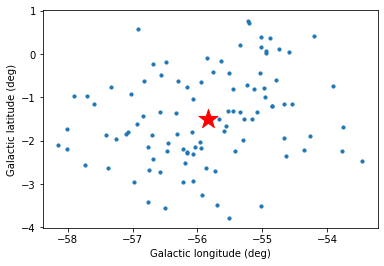

In [34]:
# Event positions
pos = events.galactic[::38]  # sub-sample every 38th event
plt.scatter(pos.l.wrap_at("180 deg").deg, pos.b.deg, s=10)
# Pointing position
pos_pnt = events.pointing_radec.galactic
plt.scatter(
    pos_pnt.l.wrap_at("180 deg").deg, pos_pnt.b.deg, marker="*", s=400, c="red"
)
plt.xlabel("Galactic longitude (deg)")
plt.ylabel("Galactic latitude (deg)")
pos_pnt

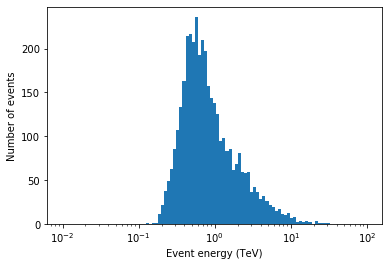

In [35]:
energy = events.table["ENERGY"].data
energy_bins = np.logspace(-2, 2, num=100)
plt.hist(energy, bins=energy_bins)
plt.semilogx()
plt.xlabel("Event energy (TeV)")
plt.ylabel("Number of events");

In [37]:
#is_gamma = events.table["MC_ID"] != 1
#print("Number of events: ", len(events.table))
#print("Number of gammas: ", is_gamma.sum())
#print("Number of hadrons: ", len(events.table) - is_gamma.sum())

#la colonne "MC_ID" n'existe pas apparemment

In [38]:
events.table.colnames

['EVENT_ID',
 'BUNCH_ID',
 'TIME',
 'MULTIP',
 'TELMASK',
 'RA',
 'DEC',
 'DIR_ERR',
 'SKYX_RADEC',
 'SKYY_RADEC',
 'DETX',
 'DETY',
 'GLON',
 'GLAT',
 'THETA',
 'PHI',
 'ALT',
 'AZ',
 'COREX',
 'COREY',
 'CORE_ERR',
 'XMAX',
 'XMAX_ERR',
 'ENERGY',
 'ENERGY_ERR',
 'PHASE',
 'HIL_MSW',
 'HIL_MSW_ERR',
 'HIL_MSL',
 'HIL_MSL_ERR']

In [41]:
# select all events within a radius of 0.5 deg around center
center = events.pointing_radec.galactic

from gammapy.utils.regions import SphericalCircleSkyRegion

region = SphericalCircleSkyRegion(center, radius=0.5 * u.deg)
events_c = events.select_region(region)

# sort events by energy
events_c.table.sort("ENERGY")

# and show highest energy photon
events_c.energy[-1].to("TeV")

<Quantity 23.86249542 TeV>